In [1]:
# Import necessary packages
import pandas as pd 
import os
from helper_functions import date_to_decimal_year, rain_predictor
from plot_functions import eruption_counter, annual_plotter, bar_plotter, by_strength
from el_nino_functions import elnino_strengths
import numpy as np

In [2]:
# Create path to data
folder_env_variable = 'MY_FOLDER_PATH'
default_folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

folder_path = os.environ.get(folder_env_variable, default_folder_path)

In [3]:
# Import tables
volcanic_events = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

oni = pd.read_csv(os.path.join(folder_path, "oni.csv"))

In [4]:
# Drops events that occurs within 9 months of a previous event at their respective volcanic sites
volcanic_events = volcanic_events.drop(5)
volcanic_events = volcanic_events.drop(24)


Eruption data must have columns: 'Volcano' and 'Start'. 'Start' is the beginning date of the eruption given as a string-- YYYY-MM-DD.

Rainfall data must have columns: 'Date', 'Longitude', 'Latitude', and 'Precipitation'. 'Date' is given as a string YYYY-MM-DD and the other three columns are floats.

In [4]:
#sites_dict = {'Wolf': (-91.35, .05, 'Wolf'), 'Fernandina': (-91.45, -.45, 'Fernandina'), 'Negra, Sierra': (-91.15, -.85, 'Sierra Negra'), 'Azul, Cerro': (-91.25, -.55, 'Cerro Azul') } # Long/lat pairs must exist in rainfall data
#volcanos = {'Wolf': (-91.20, 0.0, 'Wolf'), 'Fernandina': (-91.33, -0.22, 'Fernandina'), 'Negra, Sierra': (-91.17, -0.83, 'Sierra Negra'), 'Azul, Cerro': (-91.24, -0.55, 'Cerro Azul') } # Long/lat pairs must exist in rainfall data
sites_dict = {'Fernandina': (-91.45, -.45, 'Fernandina')}
quantiles = 1 # Number of bins to break up rainfall into
rolling_number = 90 # Number of days to average rainfall over
log_flag = True # If true, applies a log scaling to the data
by_season = False # Make true if you want to consider rainfall quantiles yearly, or False to consider rainfall quantiles across the entire date range
start = min(rainfall['Date'])
end = max(rainfall['Date'])
strengths = {}
anom_types = {'moderate nina': -1, 'moderate nino': 1}
for i in anom_types:
    if i == 'weak nina' or i == 'weak nino':
        strengths.update(elnino_strengths(oni, anom_types[i], i, 5))
    else:
        strengths.update(elnino_strengths(oni, anom_types[i], i, 3)) 

# Uncomment below to use rain predictor gauge location. This notebook combines pre-2000 predictions with post-2000 satellite data

compare_site = ayora  # Choose ayora or bellavista to compare rainfall to
print_summary = False # Make true if you want to see summary of regression
pred_rain = rain_predictor(rainfall, sites_dict, compare_site, rolling_number, print_summary)
rainfall_two = pred_rain[pred_rain['Date'] < start].copy()
rainfall = pd.concat([rainfall, rainfall_two])
start = min(rainfall['Date'])
end = max(rainfall['Date'])

# Picks out elninos/laninas within dates of rainfall data. Converts dates to decimals.
elninos = {'weak nina': [], 'moderate nina': [], 'strong nina': [], 'weak nino': [], 'moderate nino': [], 'strong nino': [], 'very strong nino': []}

if strengths != None:
    for j in strengths:
        for i in strengths[j]:
            if i[1] > start and i[0] < end:
                first = max(i[0], start)
                last = min(i[1], end)
                elninos[j].append([date_to_decimal_year(first), date_to_decimal_year(last)])



In [8]:
print(elninos)

{'weak nina': [[1965.0, 1965.0384], [1970.5342, 1972.0384], [1973.3671, 1974.5342], [1974.7863, 1976.2027], [1984.789, 1985.4521], [1988.3699, 1989.3671], [1995.6192, 1996.2027], [1998.5342, 2001.1233], [2005.8712, 2006.2], [2007.5342, 2008.4548], [2008.874, 2009.2], [2010.4521, 2011.3671], [2011.6192, 2012.2027], [2016.6219, 2016.9562], [2017.7863, 2018.2849], [2020.6219, 2021.2849], [2021.7041, 2023.0384]], 'moderate nina': [], 'strong nina': [], 'weak nino': [[1965.4521, 1966.2849], [1968.789, 1969.3671], [1969.6192, 1970.0384], [1972.3699, 1973.2], [1976.7068, 1977.1233], [1977.7041, 1978.0384], [1982.3671, 1983.4521], [1986.7041, 1988.1233], [1991.4521, 1992.4548], [1994.7041, 1995.2], [1997.3671, 1998.2849], [2002.4521, 2003.1233], [2004.6219, 2005.1233], [2006.7041, 2007.0384], [2009.6192, 2010.2], [2015.2, 2016.2877], [2018.7863, 2019.3671]], 'moderate nino': [], 'strong nino': [], 'very strong nino': []}


In [5]:
# Needed to combine pre and post 2000 data
rainfall = rainfall.reset_index(drop=True)

In [6]:
volcanic_events.drop(volcanic_events.index, inplace=True)

0


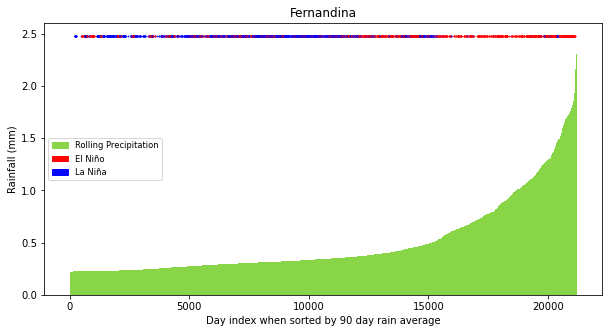

In [7]:
all_rain, event_rain = by_strength(sites_dict, volcanic_events, rainfall, quantiles, rolling_number, elninos, recur=False)

In [18]:
fern = np.array(event_rain['Fernandina'])
print(np.mean(fern))
print(np.median(all_rain['Fernandina']))

0.5556034665787988
0.16179422138540484
